In [2]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
data_train = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('fashionmnist/fashion-mnist_test.csv')

In [4]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [5]:
X = np.array(data_train.iloc[:,1:])
y = to_categorical(np.array(data_train.iloc[:,0]))

# Split validation data to optimize classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# Test data
X_test = np.array(data_test.iloc[:,1:])
y_test = to_categorical(np.array(data_test.iloc[:,0]))

In [16]:
# Reshape images arrays into 28 x 28 matrices
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [17]:
# Convert data to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

# Normalize values 
X_train /= 255
X_test /= 255
X_val /= 255

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [19]:
batch_size = 256
num_classes = 10
epochs = 50

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [22]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 45s 928us/step - loss: 1.3207 - acc: 0.5102 - val_loss: 0.8167 - val_acc: 0.6952
Epoch 2/50
48000/48000 [==============================] - 44s 918us/step - loss: 0.8378 - acc: 0.6821 - val_loss: 0.7121 - val_acc: 0.7308
Epoch 3/50
48000/48000 [==============================] - 44s 923us/step - loss: 0.7495 - acc: 0.7150 - val_loss: 0.6493 - val_acc: 0.7478
Epoch 4/50
48000/48000 [==============================] - 44s 922us/step - loss: 0.6903 - acc: 0.7350 - val_loss: 0.5958 - val_acc: 0.7649
Epoch 5/50
48000/48000 [==============================] - 45s 933us/step - loss: 0.6480 - acc: 0.7504 - val_loss: 0.5604 - val_acc: 0.7756
Epoch 6/50
48000/48000 [==============================] - 45s 937us/step - loss: 0.6159 - acc: 0.7618 - val_loss: 0.5451 - val_acc: 0.7815
Epoch 7/50
48000/48000 [==============================] - 47s 984us/step - loss: 0.5875 - acc: 0.7720 - val_loss: 0.

In [23]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.285076905894
Test accuracy: 0.8908


### Results

This classifier does not perform as well as the best baseline, which is an SVM classifier with mean accuracy of 0.897.

Plot training and validation accuracy and loss.

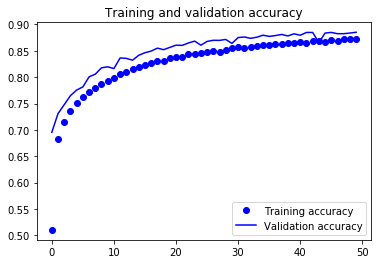

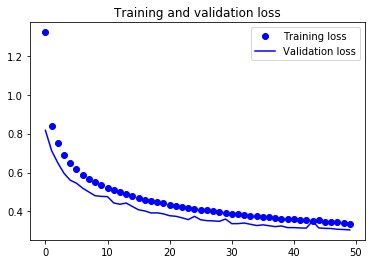

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Classification Report

In [38]:
#get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

#get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [29]:
# Dictionary with label numbers as keys, label names as values
label_names = { 0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot" }

In [30]:
from sklearn.metrics import classification_report
target_names = ["{}".format(label_names[i]) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

T-shirt/top       0.81      0.86      0.84      1000
    Trouser       0.99      0.97      0.98      1000
   Pullover       0.84      0.83      0.83      1000
      Dress       0.89      0.92      0.90      1000
       Coat       0.81      0.84      0.82      1000
     Sandal       0.98      0.95      0.97      1000
      Shirt       0.72      0.63      0.67      1000
    Sneaker       0.93      0.96      0.95      1000
        Bag       0.98      0.97      0.97      1000
 Ankle boot       0.96      0.96      0.96      1000

avg / total       0.89      0.89      0.89     10000



#### Examples of correctly predicted images:

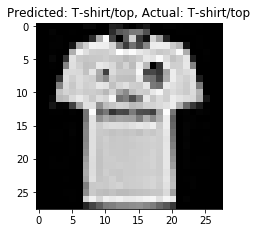

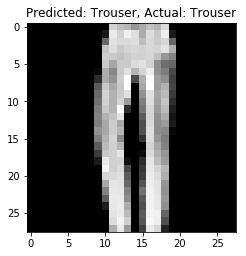

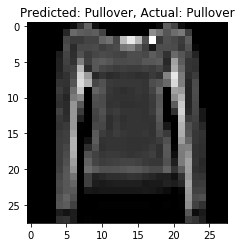

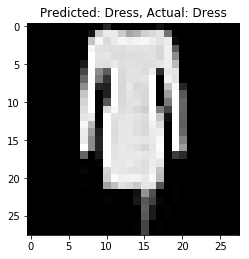

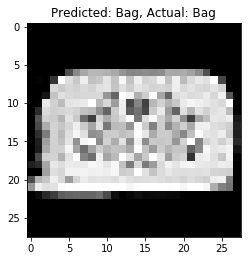

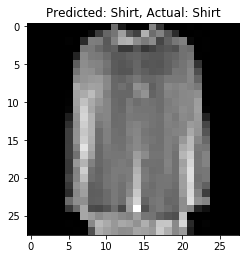

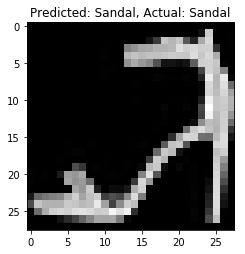

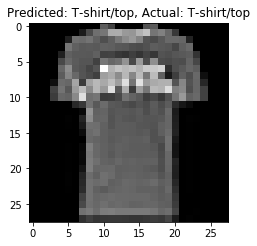

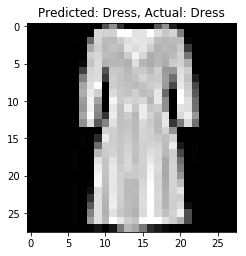

In [45]:
for i, correct_img in enumerate(correct[:9]):
    plt.figure(figsize=(10,10))
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct_img].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Actual: {}".format(label_names[predicted_classes[correct_img]], label_names[y_true[correct_img]]))
    plt.tight_layout()

#### Examples of correctly incorrectly predicted images:

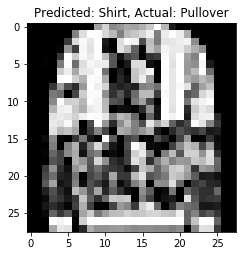

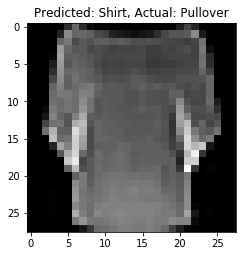

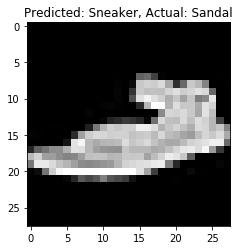

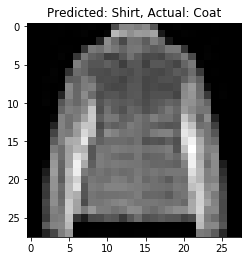

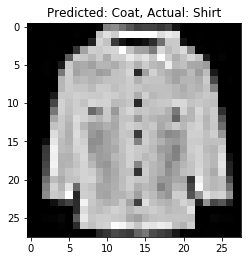

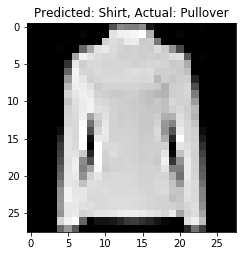

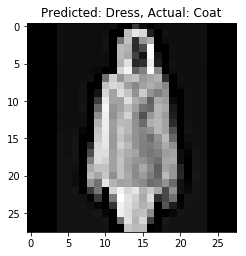

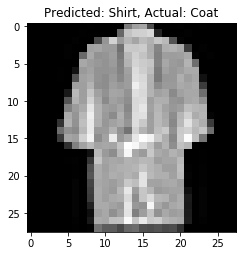

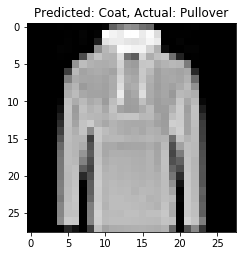

In [46]:
for i, incorrect_img in enumerate(incorrect[0:9]):
    plt.figure(figsize=(10,10))
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect_img].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Actual: {}".format(label_names[predicted_classes[incorrect_img]], label_names[y_true[incorrect_img]]))
    plt.tight_layout()

## Let's look at the activations

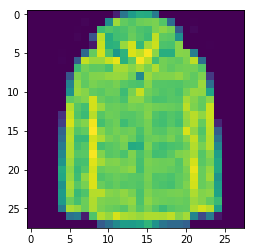

In [64]:
# Here's an image we'll check out:
test_im = X_train[99]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

#### Here's the activation of the 2nd channel of the first layer:

/Users/katrinasperry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


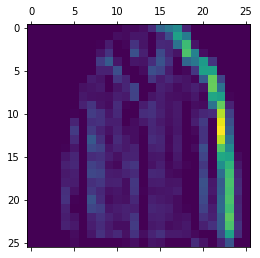

In [65]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

#### And a plot of the activations of the other convolutions:

/Users/katrinasperry/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


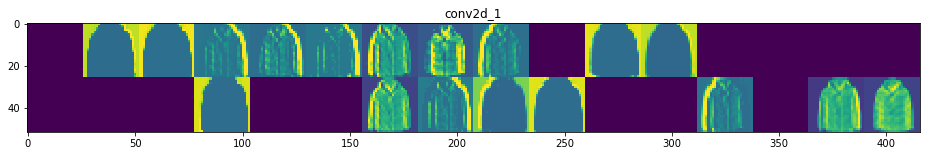

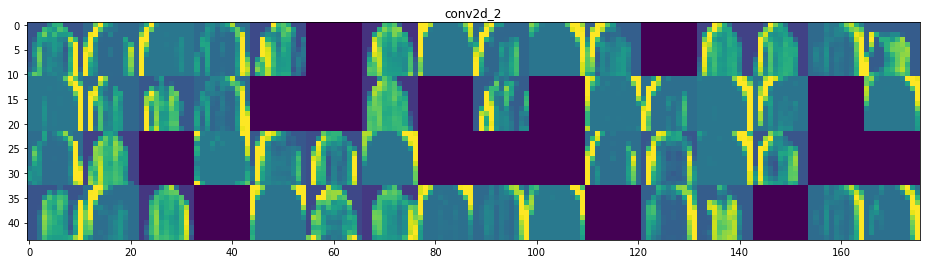

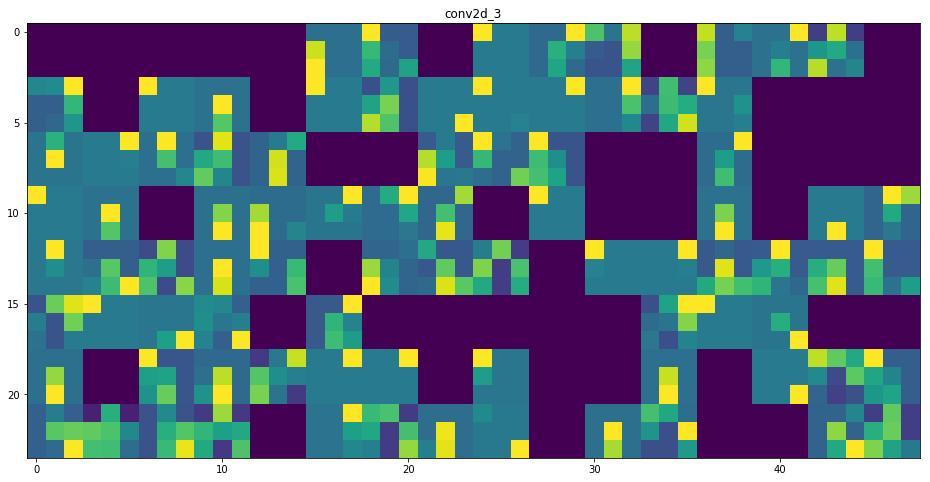

In [66]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')